# Import libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import missingno as msn
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract dataset

In [2]:
df=pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


let's see columns

In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

using missingno bar to see null values

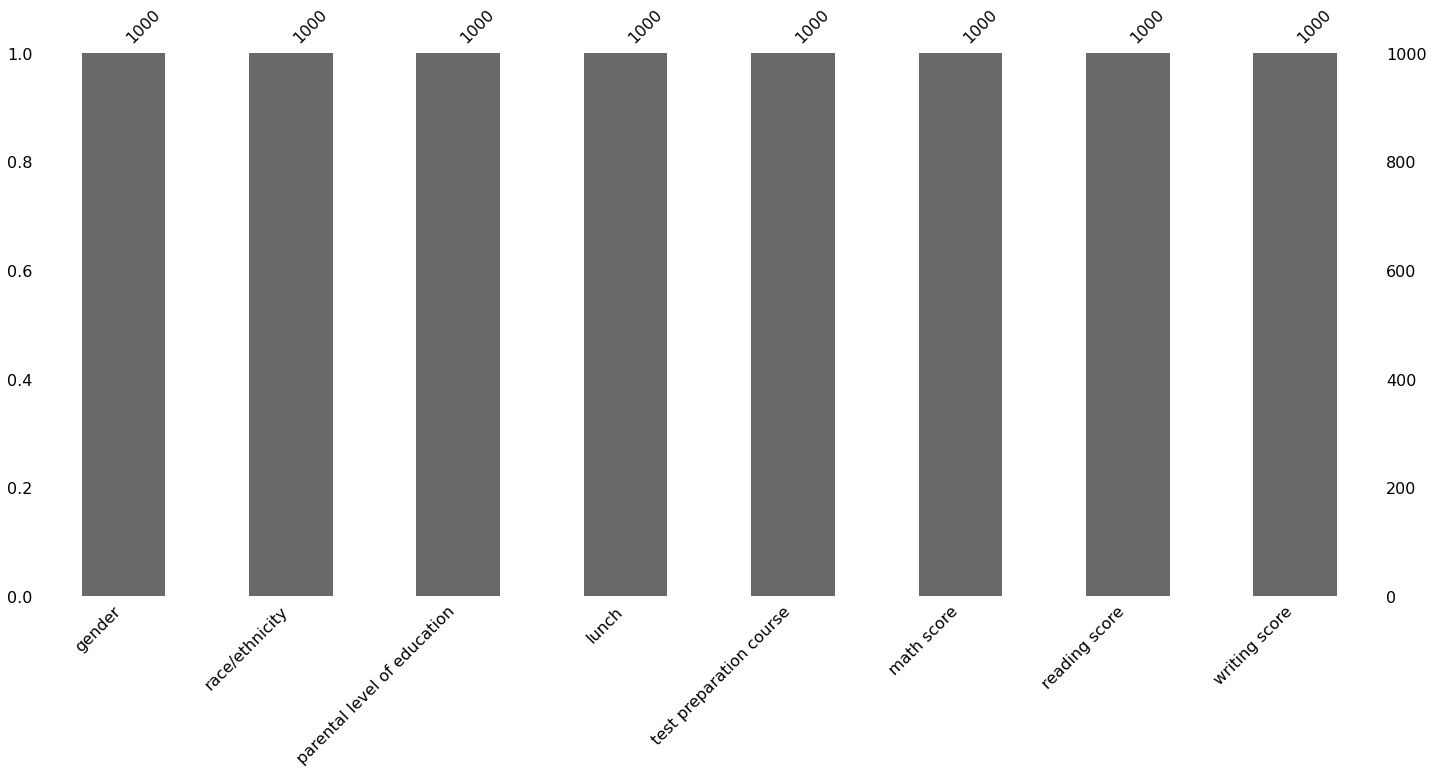

In [8]:
msn.bar(df)
plt.show()

As you see there are not null values and we don't need to drop column

In [9]:
df.isnull().sum()/df.shape[0]

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [12]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [13]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [14]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data visualization

# Race\ethnicity values

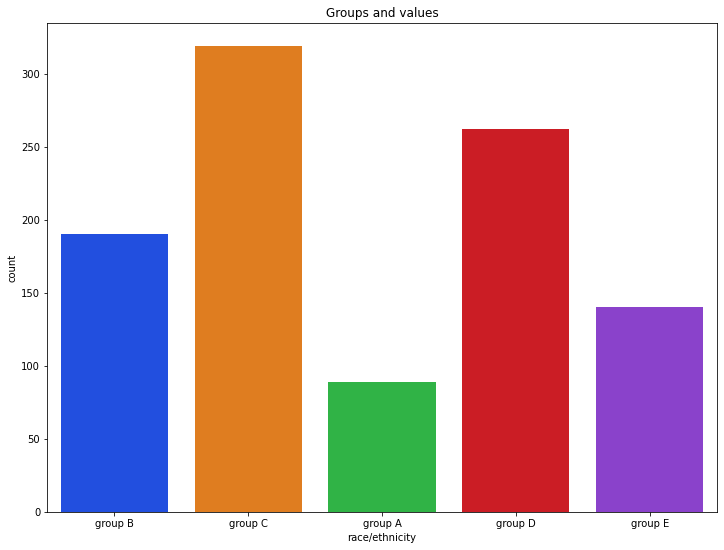

In [17]:
sns.set_palette('bright')
plt.figure(figsize=(12,9))
sns.countplot(df['race/ethnicity'])
plt.title('Groups and values')
plt.show()

In [18]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

lunch values according to gender values

we can set palette using seaborn like that:  sns.set_palette('pastel')

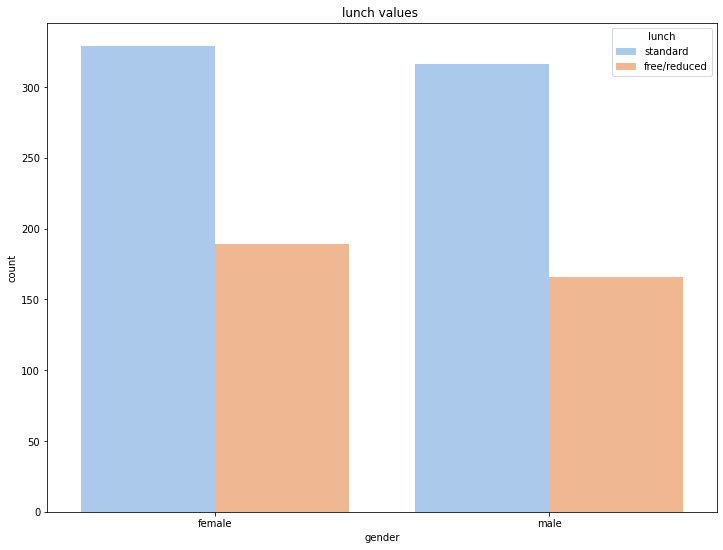

In [19]:
sns.set_palette('pastel')
plt.figure(figsize=(12,9))
sns.countplot(x='gender', hue='lunch', data=df)
plt.title('lunch values ')
plt.show()

Let's see what we can do with data 

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

# Educational level values

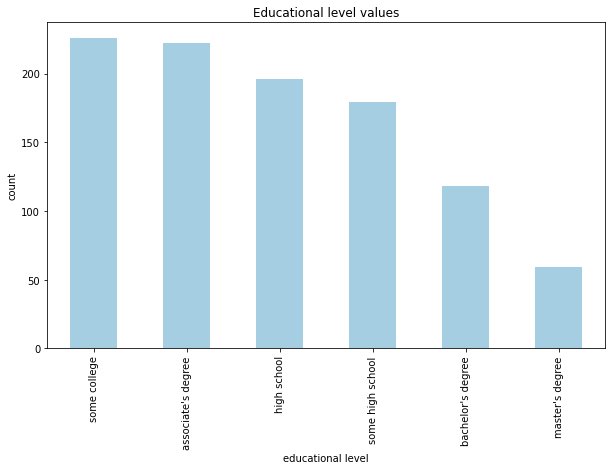

In [22]:
plt.figure(figsize=(10,6))
df['parental level of education'].value_counts().sort_values(ascending=False).plot.bar(colormap='Paired')
plt.title('Educational level values')
plt.xlabel('educational level')
plt.ylabel('count')

plt.show()

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# math scores of groups which contained race/ethnicity

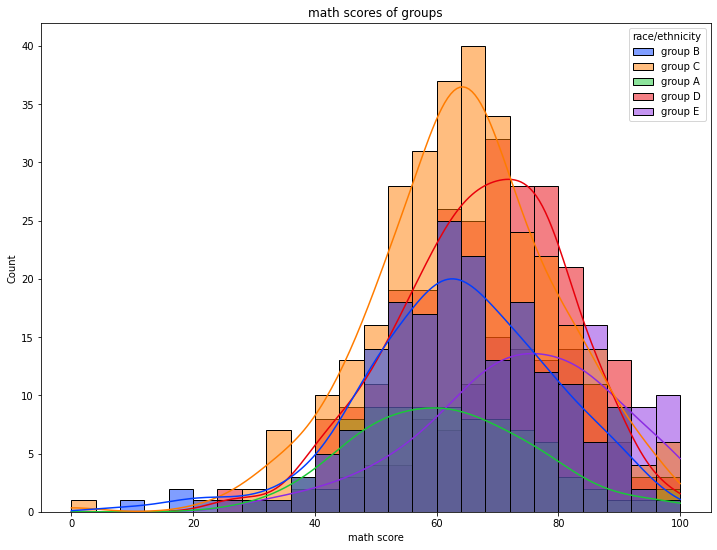

In [24]:
sns.set_palette('bright') 
plt.figure(figsize=(12,9))
sns.histplot(x='math score', data=df, kde=True, hue='race/ethnicity')
plt.title('math scores of groups')
plt.show()

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
df['reading score'].nunique()

72

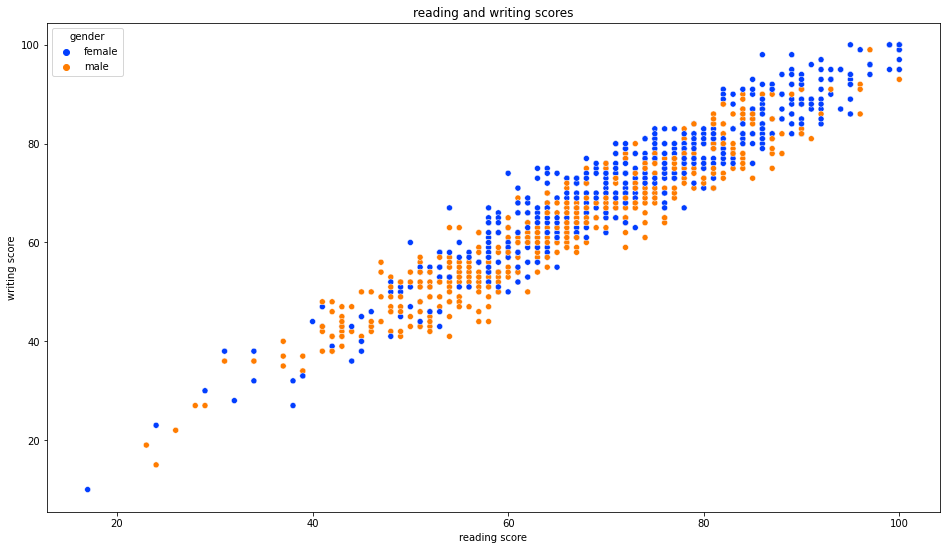

In [27]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='reading score', y='writing score', hue='gender', data=df)
plt.title('reading and writing scores')

plt.show()

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
education=df['parental level of education'].value_counts()
print(education)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


Educational degrees in pie chart

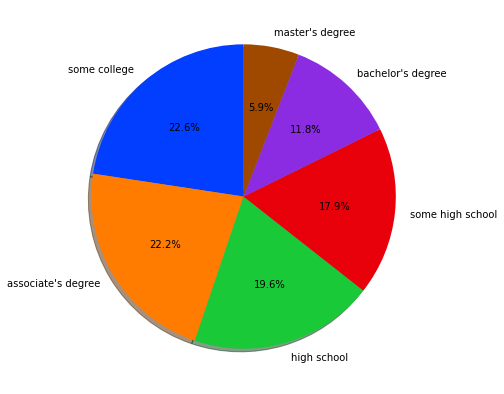

In [30]:
sns.set_palette('bright')
plt.figure(figsize=(10,7))
labels=education.index
sizes=education.values
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,startangle=90)
plt.show()

In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
df['math score'].mean()

66.089

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


reading scores 

In [34]:
fig = px.line(df, y='reading score', color='gender')

fig.show()

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


groups and their writing scores

In [36]:
fig = px.bar(df, x='writing score', y='race/ethnicity', color='gender')

fig.show()

level of education for gender

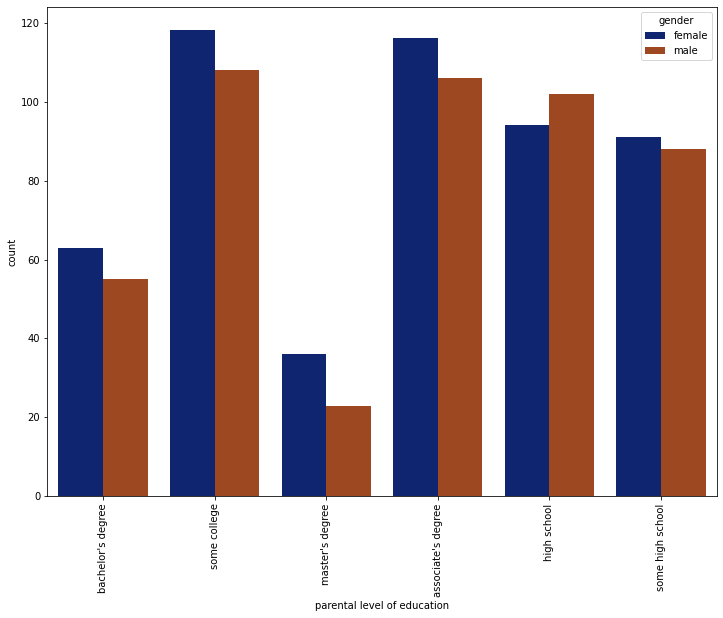

In [37]:
sns.set_palette('dark')
plt.figure(figsize=(12,9))
sns.countplot(x='parental level of education', hue='gender', data=df)
plt.xticks(rotation=90)
plt.show()

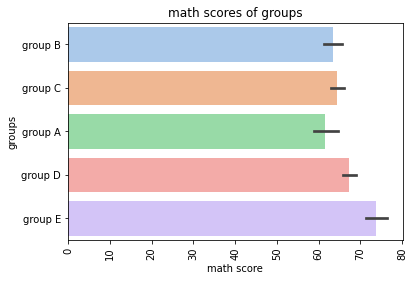

In [38]:
sns.set_palette('pastel')
sns.barplot(y='race/ethnicity',x='math score',data=df)
plt.title('math scores of groups')
plt.xlabel('math score')
plt.ylabel('groups')
plt.xticks(rotation=90)
plt.show()

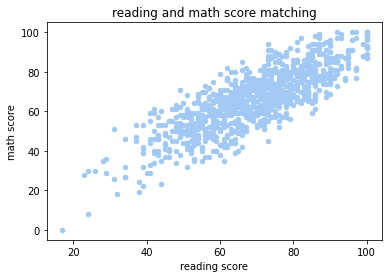

In [39]:
df.plot(x="reading score", y="math score", kind="scatter")
plt.title('reading and math score matching')
plt.show() 

In [40]:
gender=df['gender'].value_counts()
print(gender)

female    518
male      482
Name: gender, dtype: int64


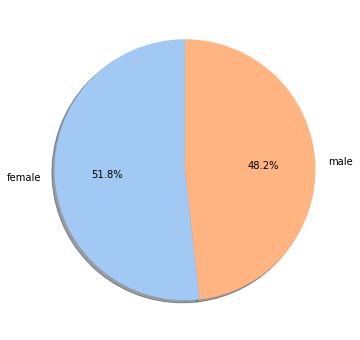

In [41]:
labels=gender.index
sizes=gender.values
plt.figure(figsize=(12,6))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,startangle=90)
plt.show()

In [42]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
df['result']=df['math score']+df['reading score']+df['writing score']

Let's find outliers

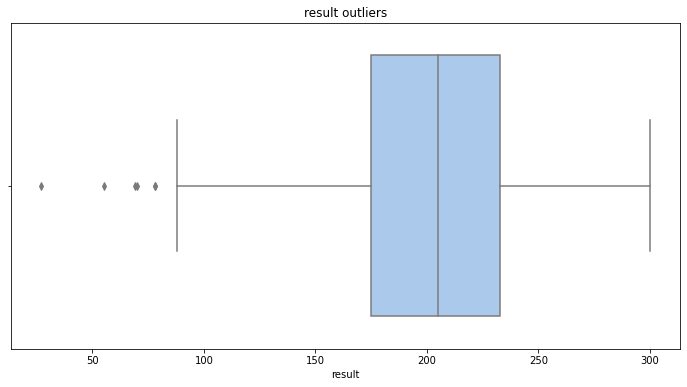

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(df['result'])
plt.title('result outliers')
plt.show()

we can remove outliers and also replace.if we remove our data shape will be reduced,you can see at the end,
if we replace data we will change data outliers,you can also see this one at the end.

remove outliers

In [45]:
def out_bound(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    return lower_bound, upper_bound

In [46]:
print(out_bound(df, 'result'))

(88.0, 320.0)


In [47]:
def remove_outliers(data, col):
    l_b, u_b=out_bound(data, col)
    
    return data[ (data[col]>l_b) & (data[col]<u_b) ]

In [48]:
df1=remove_outliers(df, 'result')

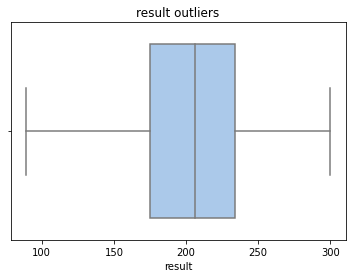

In [49]:
sns.boxplot(df1['result'])
plt.title('result outliers')
plt.show()

replace outliers

In [50]:
def outliers_equal_bounds(data, col):
    l_b, u_b=out_bound(data, col)
    
    data.loc[(data[col]<l_b), col]=l_b
    data.loc[(data[col]>u_b), col]=u_b
    
    return data
    

In [51]:
df2=outliers_equal_bounds(df, 'result')

<AxesSubplot:xlabel='result'>

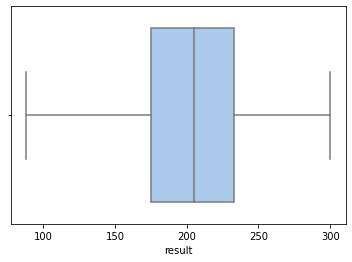

In [52]:
sns.boxplot(df2['result'])

In [53]:
df.shape     #the real data

(1000, 9)

In [54]:
df1.shape  

(993, 9)

removed outliers data -df1 ,as you can see the shape of data is reduced

In [55]:
df2.shape      

(1000, 9)

replaced outliers data-df2,nothing has changed

using seaborn boxplot to see gender values outliers

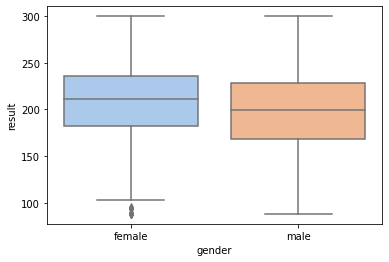

In [56]:
sns.boxplot(x='gender', y='result', data=df)
plt.show()

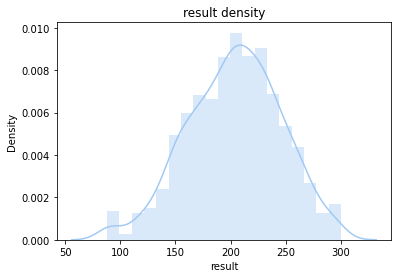

In [57]:
sns.distplot(df['result'])
plt.title('result density')
plt.show()

male and female students performance results

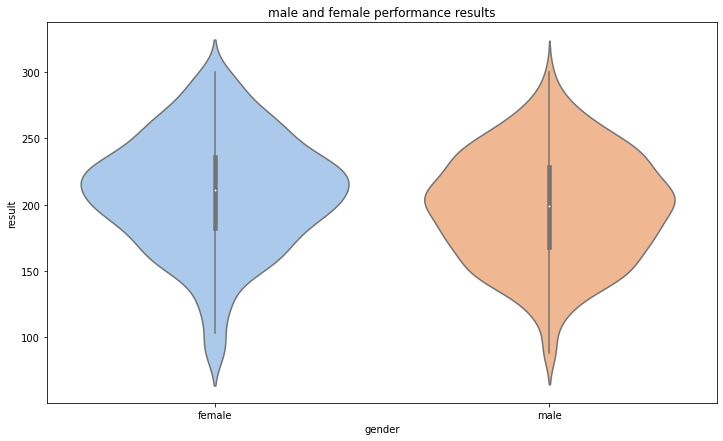

In [58]:
plt.figure(figsize=(12,7))
sns.violinplot(x=df['gender'],y=df['result'])
plt.title('male and female performance results')
plt.show()

In [59]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


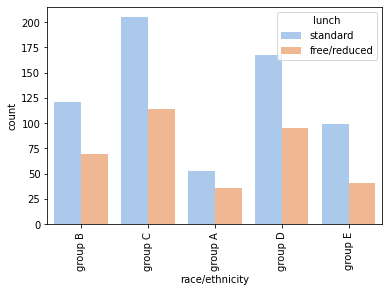

In [60]:
sns.set_palette('pastel')
sns.countplot(x='race/ethnicity', hue='lunch', data=df)
plt.xticks(rotation=90)
plt.show()

In [61]:
df.describe(include=['object']).T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


In [62]:
df['percentage']=df['result']/3

In [63]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,result,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


let's do something different,extract grades using python codes

In [64]:
def Grade(Percentage):
    if Percentage >= 95:
        return 'O'
    
    if Percentage >= 81:
        return 'A'
    
    if Percentage >= 71:
        return 'B'
    
    if Percentage >= 61:
        return 'C'
    
    if Percentage >= 51:
        return 'D'
    
    if Percentage >= 41:
        return 'E'
    
    return 'F'

In [65]:
df['Grade']=df.apply(lambda x: Grade(x['percentage']),axis=1)

In [66]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,result,percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,229,76.333333,B


In [67]:
df.corr()

,math score,reading score,writing score,result,percentage
math score,1.000000,0.817580,0.802642,0.916370,0.916370
reading score,0.817580,1.000000,0.954598,0.969660,0.969660
writing score,0.802642,0.954598,1.000000,0.964442,0.964442
result,0.916370,0.969660,0.964442,1.000000,1.000000
percentage,0.916370,0.969660,0.964442,1.000000,1.000000


# correlation analysis

In [68]:
corr=df.corr()

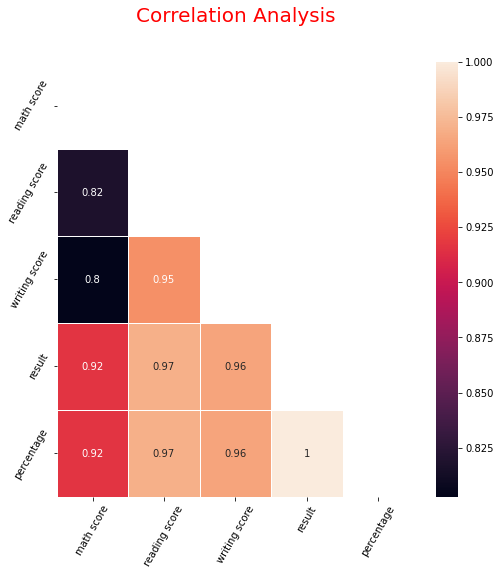

In [69]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(df.corr(), mask=mask, annot=True, linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

# Data visualization

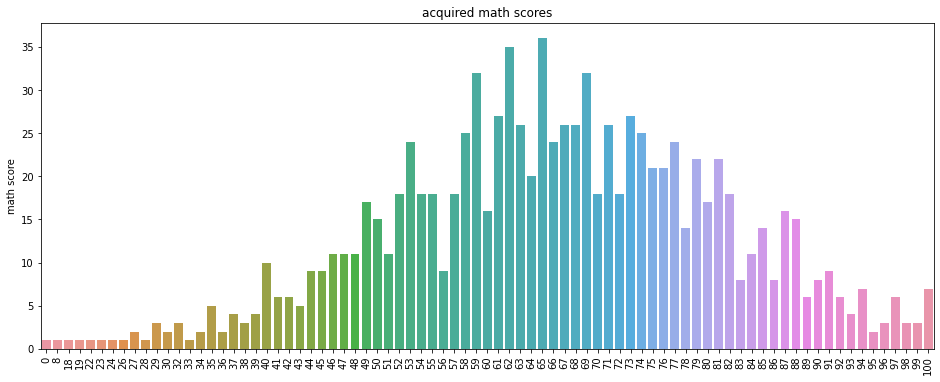

In [70]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['math score'].value_counts().index, y=df['math score'].value_counts())
plt.title('acquired math scores')
plt.xticks(rotation=90)
plt.show()

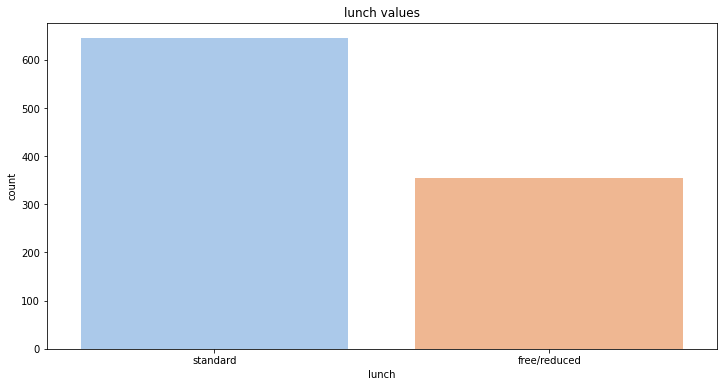

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(x='lunch',data=df)
plt.title('lunch values')
plt.show()

# math scores of male and female participants

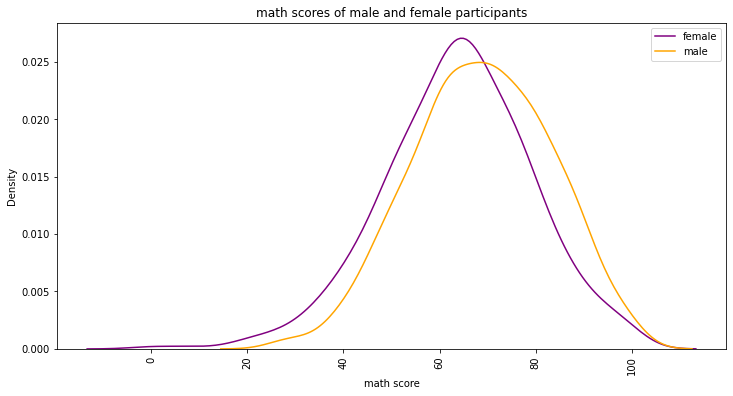

In [72]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df['gender']=='female']['math score'], color='purple', label='female')
sns.kdeplot(df[df['gender']=='male']['math score'], color='orange', label='male')
plt.title('math scores of male and female participants')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()